# Laboratory Work #6 "Image processing with the OpenCV library and working with the bunch of digital image file"
## Executed by student of group KN-222b.e. Miniailo Dmytro

**Objective:** Learning OpenCV library methods for working with image files

### Choosing variant

In [4]:
N = ord("D") % 5 + 1

print(N)

4


### Performing exercises

#### Libraries used in the tasks

In [7]:
import pandas as pd
import cv2
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

#### Import data

In [9]:
df = pd.read_excel('lab6.xlsx')
df.head()

,N,file name,image size,glasses color,line width
0,1,emma-watson2.jpg,300x300,red,2
1,2,emma-watson.jpg,400x400,blue,3
2,3,draco.jpg,700x700,cian,4
3,4,longbottom.jpg,600x600,magenta,5
4,5,ron_wesley.jpg,500x500,yellow,6


#### Get variant data

In [11]:
variant_data = df[df['N'] == 4].iloc[0]

In [12]:
image_path = variant_data['file name']
image_size = tuple(map(int, variant_data['image size'].split('x')))
glasses_color = variant_data['glasses color']
line_width = int(variant_data['line width'])

In [13]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

#### Create a function that takes data from the dataframe as arguments and returns a reduced image with added "round glasses" and saves the resulting image to a file

In [31]:
# Function to draw a circle (glasses lens) at a specified eye center
def draw_circle(draw, center, radius, color, line_width):
    draw.ellipse(
        [(center[0] - radius, center[1] - radius), (center[0] + radius, center[1] + radius)],
        outline=color,
        width=line_width,
    )

# Function to draw connecting lines between glasses
def draw_connecting_lines(draw, left_eye_center, right_eye_center, radius_left, radius_right, color, line_width):
    # Calculate edge points for the connecting line between circles
    left_edge = (left_eye_center[0] + radius_left, left_eye_center[1])
    right_edge = (right_eye_center[0] - radius_right, right_eye_center[1])
    draw.line([left_edge, right_edge], fill=color, width=line_width)

    # Calculate and draw side lines extending outward
    side_line_length_multiplier = 1.25  # Value for modifying lines length

    left_side_line_start = (left_eye_center[0] - radius_left, left_eye_center[1])
    left_side_line_end = (left_eye_center[0] - radius_left - radius_left * side_line_length_multiplier, left_eye_center[1])
    
    right_side_line_start = (right_eye_center[0] + radius_right, right_eye_center[1])
    right_side_line_end = (right_eye_center[0] + radius_right + radius_right * side_line_length_multiplier, right_eye_center[1])
    
    draw.line([left_side_line_start, left_side_line_end], fill=color, width=line_width)
    draw.line([right_side_line_start, right_side_line_end], fill=color, width=line_width)

# Main function to add round glasses to the image
def add_round_glasses(image_path, output_path, size=(600, 600), glasses_color="magenta", line_width=5):
    # Load image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect face
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        print("No face detected.")
        return

    # Process face region and resize
    x, y, w, h = faces[0]
    padding = int(0.5 * w)
    cropped_image = image[max(0, y - padding):min(image.shape[0], y + h + padding),
                          max(0, x - padding):min(image.shape[1], x + w + padding)]
    
    pil_cropped = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    pil_cropped.thumbnail(size, Image.LANCZOS)
    resized_image = np.array(pil_cropped)
    resized_gray = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)

    # Detect eyes
    eyes = eye_cascade.detectMultiScale(resized_gray)
    if len(eyes) < 2:
        print("Not enough eyes detected.")
        return

    # Sort eyes by x-coordinate to distinguish left and right eyes
    eyes = sorted(eyes, key=lambda e: e[0])
    (ex1, ey1, ew1, eh1), (ex2, ey2, ew2, eh2) = eyes[:2]
    left_eye_center = (ex1 + ew1 // 2, ey1 + eh1 // 2)
    right_eye_center = (ex2 + ew2 // 2, ey2 + eh2 // 2)
    radius_left = int(ew1 / 2)
    radius_right = int(ew2 / 2)

    # Convert to PIL format and draw glasses
    pil_image = Image.fromarray(resized_image)
    draw = ImageDraw.Draw(pil_image)
    color = glasses_color.lower()

    # Draw glasses components
    draw_circle(draw, left_eye_center, radius_left, color, line_width)
    draw_circle(draw, right_eye_center, radius_right, color, line_width)
    draw_connecting_lines(draw, left_eye_center, right_eye_center, radius_left, radius_right, color, line_width)

    # Save and display the final image
    pil_image.save(output_path)
    print(f"Image saved at {output_path}")
    plt.imshow(pil_image)
    plt.axis('off')
    plt.show()

Image saved at longbottom_with_glasses.jpg


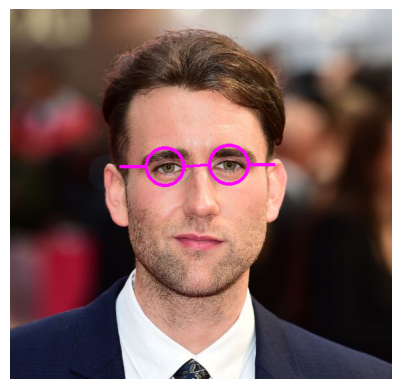

In [33]:
add_round_glasses(image_path, 'longbottom_with_glasses.jpg', size=image_size, glasses_color=glasses_color, line_width=line_width)

**Conclusion:** During this laboratory work, I was gaining skills in image processing using OpenCV library.